# Visual Data Analysis Assignment - 4
## By Aakash Aggarwal and Bilge Ulusay

In [1]:
import pandas as pd

import seaborn as sns

from matplotlib import pyplot as plt

import numpy as np

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
%%bash

wget --user="vda" --password="vda.2019" "http://cg.cs.uni-bonn.de/fileadmin/teaching/2019/SS/vda/exercises/vda-assignment-04/breast-cancer-wisconsin.xlsx"


--2019-04-26 18:12:26--  http://cg.cs.uni-bonn.de/fileadmin/teaching/2019/SS/vda/exercises/vda-assignment-04/breast-cancer-wisconsin.xlsx
Resolving cg.cs.uni-bonn.de (cg.cs.uni-bonn.de)... 131.220.236.164
Connecting to cg.cs.uni-bonn.de (cg.cs.uni-bonn.de)|131.220.236.164|:80... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Reusing existing connection to cg.cs.uni-bonn.de:80.
HTTP request sent, awaiting response... 200 OK
Length: 35001 (34K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘breast-cancer-wisconsin.xlsx.9’

     0K .......... .......... .......... ....                 100% 2.91M=0.01s

2019-04-26 18:12:26 (2.91 MB/s) - ‘breast-cancer-wisconsin.xlsx.9’ saved [35001/35001]



In [3]:
df = pd.read_excel("breast-cancer-wisconsin.xlsx")

df.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
df.isnull().sum()

code            0
thickness       0
uniCelS         0
uniCelShape     0
marAdh          0
epiCelSize      0
bareNuc        16
blaChroma       0
normNuc         0
mitoses         0
class           0
dtype: int64

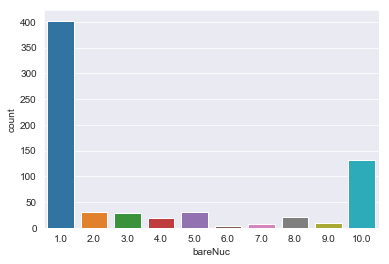

In [5]:
withoutNa = df["bareNuc"].dropna()

sns.countplot(withoutNa)

## 1 a) 
### it has been replaced with 1 or mode of the attribute as it represents thr majority of the values for the attribute

In [6]:
df.loc[df["bareNuc"].isnull(), "bareNuc"] = 1

In [7]:
pcaData = df.drop(columns=["code","class"])

pcaData.head()

,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)

pca.fit(pcaData)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

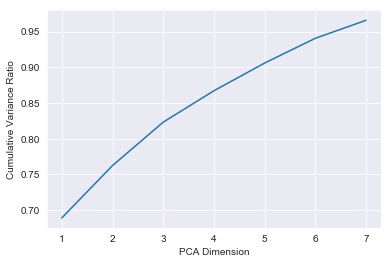

In [9]:
p = sns.lineplot(y = np.cumsum(pca.explained_variance_ratio_),x=range(1,pca.n_components_+1))
p.set(xlabel="PCA Dimension", ylabel="Cumulative Variance Ratio")
plt.show()

## 1b)
### We need 5  components to cover 90 percent of the variance

In [10]:
pca = PCA(n_components=5)
pca.fit(pcaData)

fiveComponents = pca.transform(pcaData)
fiveComponents.shape

(699, 5)

In [11]:
fiveComponentsDf = pd.DataFrame(data=fiveComponents,columns=["Component1","Component2","Component3","Component4","Component5"])
fiveComponentsDf["class"] = df["class"]
fiveComponentsDf.loc[fiveComponentsDf["class"] == 2,"class"] = "benign"
fiveComponentsDf.loc[fiveComponentsDf["class"] == 4,"class"] = "malignant"

fiveComponentsDf.head()

,Component1,Component2,Component3,Component4,Component5,class
0,-4.418342,0.032549,-1.732736,0.109784,-0.834715,benign
1,4.861916,-4.869842,1.035612,0.642934,1.061164,benign
2,-4.575277,-0.629610,0.049151,-0.328038,0.149807,benign
3,5.165415,3.406013,-2.184542,-1.631945,3.283522,benign
4,-4.053561,-0.105016,0.081709,0.841327,-1.694524,benign


## 1 c)

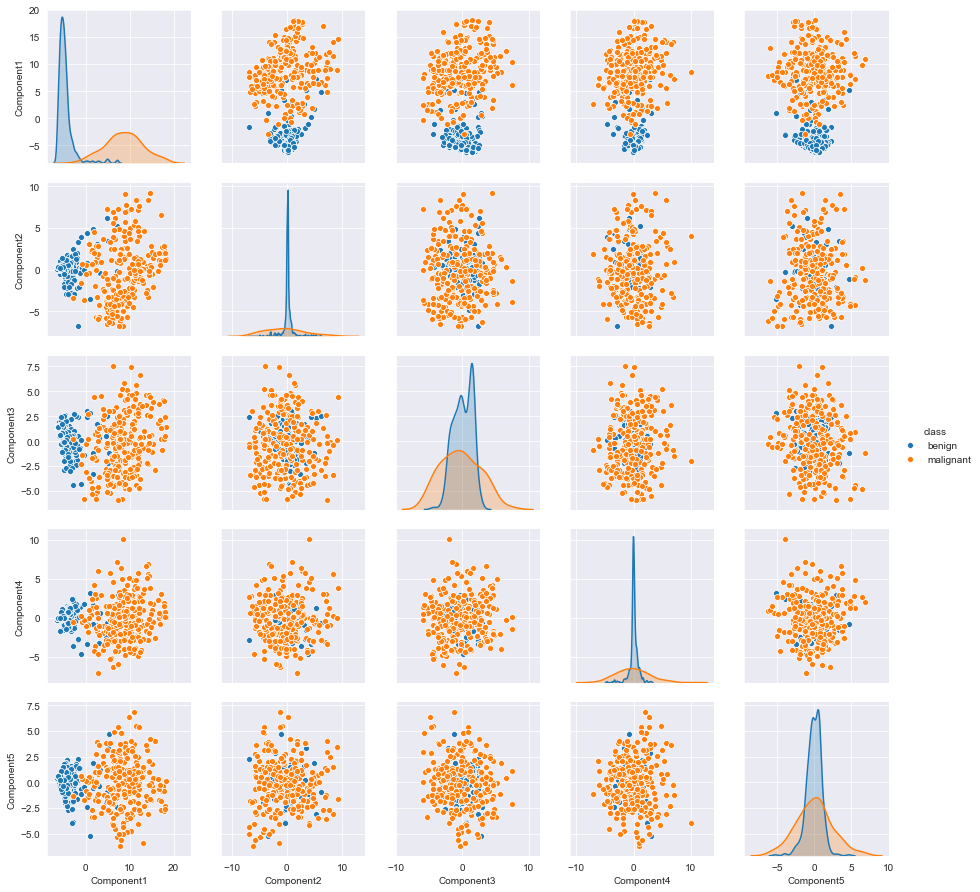

In [12]:
sns.pairplot(fiveComponentsDf,hue="class",vars=fiveComponentsDf.columns.drop("class"))

## 1 d)

### Component 1 shows the clear difference between benign and malignant samples

In [13]:
pca.components_.transpose()

array([[ 0.2983261 , -0.06201421, -0.84870565,  0.06534325, -0.40932322],
       [ 0.40439054,  0.2264635 , -0.02546854,  0.28496176,  0.34595861],
       [ 0.39224516,  0.16441813, -0.07517707,  0.19835691,  0.38210846],
       [ 0.33155363, -0.09978919,  0.48286957,  0.39844272, -0.63456569],
       [ 0.25000985,  0.18417043,  0.04907438,  0.19968275,  0.19340991],
       [ 0.43971674, -0.78618671,  0.08447575, -0.30713642,  0.16587589],
       [ 0.29212756,  0.01476453,  0.10830834, -0.04657243,  0.08070772],
       [ 0.35663675,  0.4789494 ,  0.13315283, -0.74476283, -0.2099911 ],
       [ 0.12370014,  0.16204477,  0.03508036,  0.15930581, -0.22035073]])

### First column is the eigen vector which transforms the input space to the projected space. 

In [14]:
pcaData.columns[pca.components_.transpose().argmax(axis = 0)[0]]

'bareNuc'

In [15]:
pcaData.columns[pca.components_.transpose().argmin(axis = 0)[0]]

'mitoses'

### 'bareNuc' contributes the most while 'mitoses' has  the lowest weights for the Component 1

## 1 e)
### For Component 4, we can see an outlier that has a value near 10

In [16]:
fiveComponentsDf[fiveComponentsDf["Component4"] > 9]

,Component1,Component2,Component3,Component4,Component5,class
167,8.531552,4.084467,-1.97329,10.034913,-3.941253,malignant


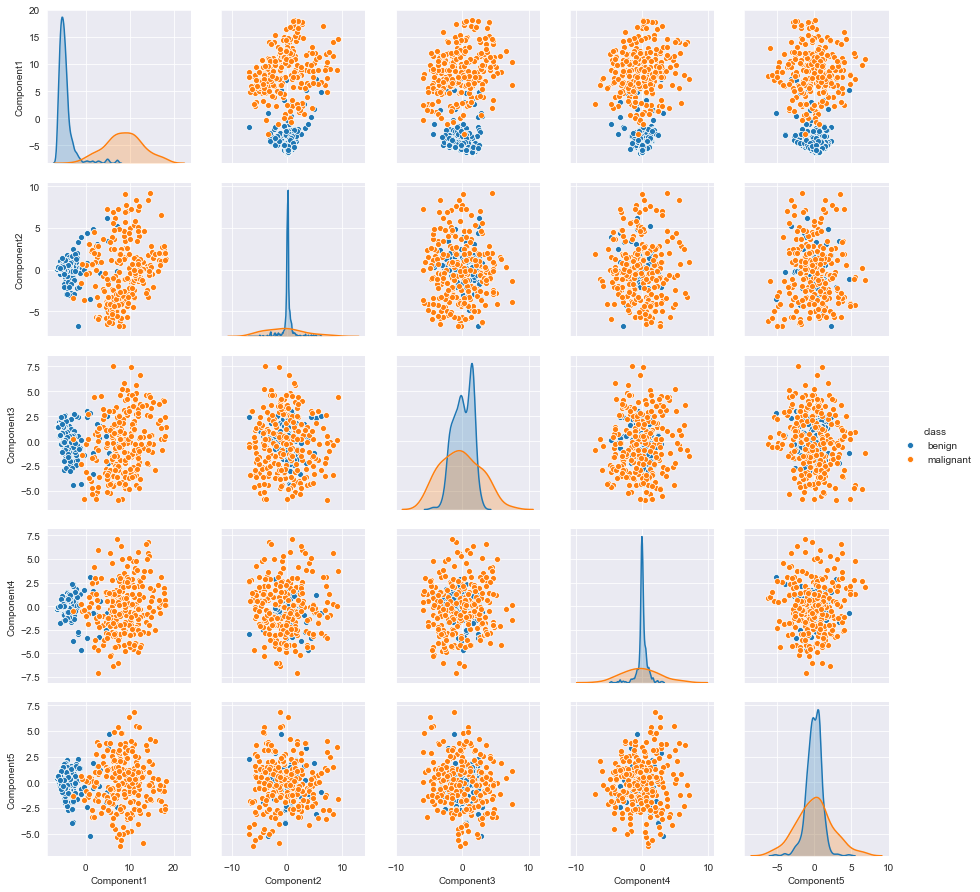

In [17]:
fiveComponentsDfClean = fiveComponentsDf.loc[fiveComponentsDf["Component4"] <= 9]

sns.pairplot(fiveComponentsDfClean,hue="class",vars=fiveComponentsDfClean.columns.drop("class"))

## 1 f)

### 1. If the variables of a dataset has very different ranges, then it is highly likely that PCA will give more weightage to the variable with larger range. This is due to the fact that absolute variance of such attribute would be high and PCA would seek to maximize the variance by using the same variable, without giving much consideration to other variables.  

### 2. We can perform Min Max Scaling for each of the attribute so that they get same ranges.



## 1 g)
### 1. For creating a 5D embeddings , we need samples from at least 6 classes, however we only have 2 and thus can create 1D embedding.

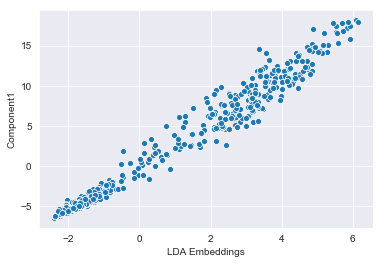

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda.fit(pcaData,df["class"])

ldaEmbedding = lda.transform(pcaData)

ldaEmbedding = np.reshape(ldaEmbedding,(ldaEmbedding.shape[0],))

ax = sns.scatterplot(x = ldaEmbedding, y = fiveComponentsDf["Component1"])
ax.set(xlabel="LDA Embeddings")
plt.show()

### 2. Yes, a clear positive correlation, as can be seen from the plot.
### 3. It is specific to the dataset, as the objective in LDA is to separate the classes, which may or may not be correlated with any component of PCA, where the preservation of the variance is targetted.